In [ ]:
# Importação das bibliotecas necessárias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [15]:
# 1. Carregamento dos dados
os.system("cls" if os.name == "nt" else "clear")

try:
    from google.colab import drive # type: ignore
    drive.mount('/content/drive')
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Atividade EAD 1 - SIAD/banknote-authentication.csv')
except ImportError:
    print("Google Colab não detectado. Continuando sem montar o Google Drive.")
    try:
        df = pd.read_csv("banknote-authentication.csv")
    except Exception as e:
        print("Arquivo não encontrado em nenhum dos diretórios!")

Google Colab não detectado. Continuando sem montar o Google Drive.


In [13]:
# 2. Exploração dos dados
print("Valores faltantes por coluna:")
print(df.isnull().sum().to_string())

Valores faltantes por coluna:
variance    0
skew        0
curtosis    0
entropy     0
class       0


In [5]:
# Estatísticas descritivas dos dados
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
          variance         skew     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


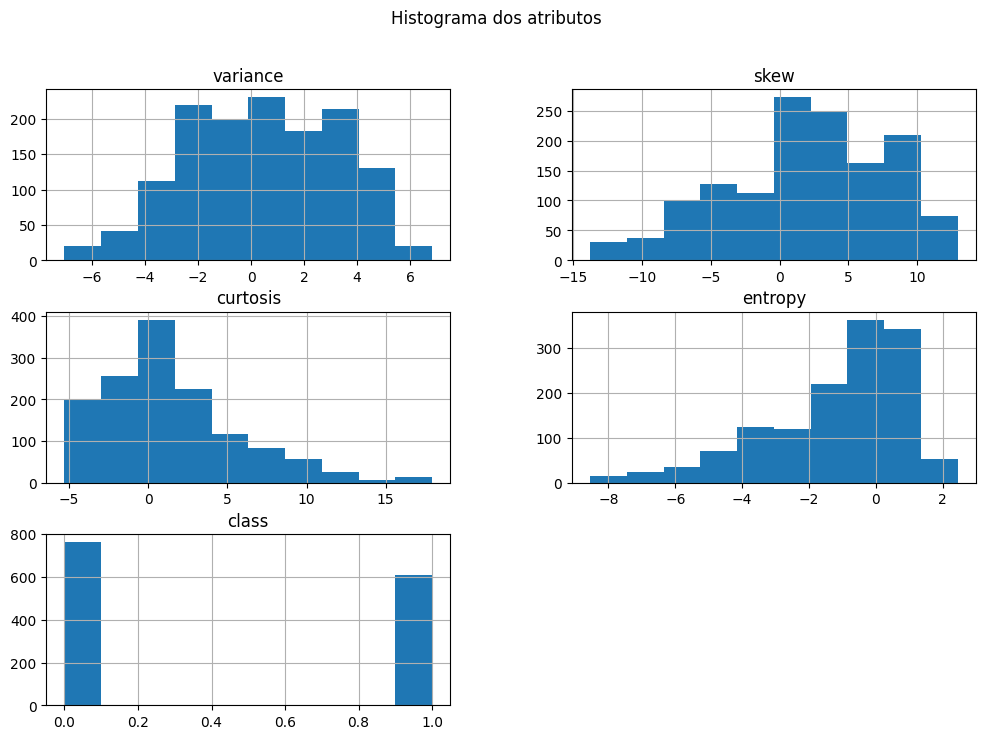

In [6]:
# Visualização da distribuição dos atributos com histogramas
df.hist(figsize=(12,8))
plt.suptitle("Histograma dos atributos")
plt.show()

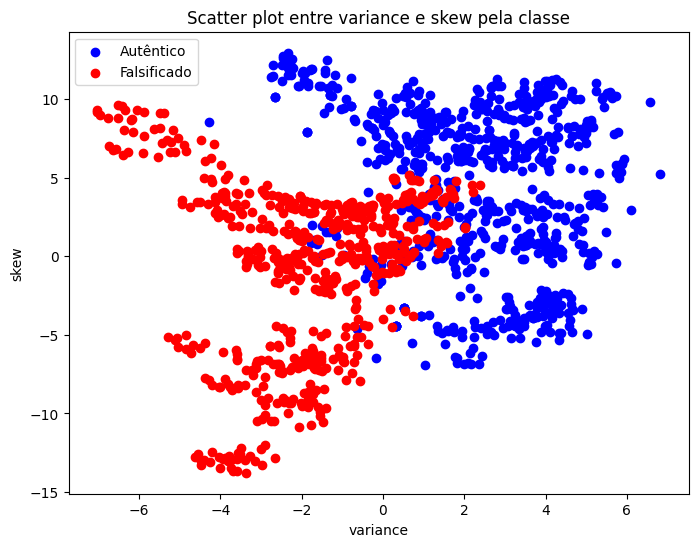

In [ ]:
# 3. Visualização dos dados
classe_col = 'class'
plt.figure(figsize=(8,6))
plt.scatter(df[df[classe_col]==0][df.columns[0]], df[df[classe_col]==0][df.columns[1]], color='blue', label='Autêntico')
plt.scatter(df[df[classe_col]==1][df.columns[0]], df[df[classe_col]==1][df.columns[1]], color='red', label='Falsificado')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("Scatter plot entre {} e {} pela classe".format(df.columns[0], df.columns[1]))
plt.legend()
plt.show()

In [ ]:
# 4. Análise inicial do problema
print("\nDimensões do dataset:")
print(df.shape)


Dimensões do dataset:
(1372, 5)


In [ ]:
print("\nDistribuição da classe:")
print(df[classe_col].value_counts().to_string())


Distribuição da classe:
class
0    762
1    610


In [ ]:
# 5. Construção do modelo de classificação
# Separando os atributos (X) e a variável target (y)
X = df.drop(columns=[classe_col])
y = df[classe_col]

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Instanciando e treinando o modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Validação cruzada com 10 folds
cv_scores = cross_val_score(rf, X, y, cv=10)
print("\nScores da validação cruzada (10 folds):")
print(cv_scores)
print("Média dos scores:", np.mean(cv_scores))


Scores da validação cruzada (10 folds):
[0.99275362 0.99275362 0.99270073 1.         0.99270073 0.97810219
 1.         0.99270073 1.         0.99270073]
Média dos scores: 0.9934412355865863


In [ ]:
# 6. Avaliação do modelo
# Prevendo no conjunto de teste
y_pred = rf.predict(X_test)

In [ ]:
# Cálculo de acurácia e precisão
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
print("\nAcurácia do modelo:", acc)
print("Precisão do modelo:", prec)


Acurácia do modelo: 0.9975728155339806
Precisão do modelo: 1.0


In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)


Matriz de Confusão:
[[229   0]
 [  1 182]]


In [ ]:
# 7. Interpretação dos resultados
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nImportância dos atributos:")
for i in range(len(importances)):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]:.4f}")

# ●  O problema foi resolvido com sucesso?
#    R: Sim, o modelo demonstrou alta acurácia e robustez entre treino e teste.

# ●  Algum atributo teve maior importância para o modelo?
#    R: Sim, o atributo de variância se destacou como crucial para a classificação.

# ●  Os resultados poderiam ser melhorados? Como?
#    R: Sim, melhorias podem ser alcançadas ajustando hiperparâmetros e aprimorando o pré-processamento.



Importância dos atributos:
variance: 0.5509
skew: 0.2294
curtosis: 0.1581
entropy: 0.0616


In [ ]:
# 8. Reanálise com Normalização
# Aplicando StandardScaler para normalizar os atributos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dividindo novamente os dados normalizados em treino e teste
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Treinando o modelo com os dados normalizados
rf_scaled = RandomForestClassifier(random_state=42)
rf_scaled.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Validação cruzada com 10 folds nos dados normalizados
cv_scores_scaled = cross_val_score(rf_scaled, X_scaled, y, cv=10)
print("\nScores da validação cruzada com dados normalizados (10 folds):")
print(cv_scores_scaled)
print("Média dos scores:", np.mean(cv_scores_scaled))


Scores da validação cruzada com dados normalizados (10 folds):
[0.99275362 0.99275362 0.99270073 1.         0.99270073 0.97810219
 1.         0.99270073 1.         0.99270073]
Média dos scores: 0.9934412355865863


In [ ]:
# Avaliação do modelo com dados normalizados
y_pred_scaled = rf_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
prec_scaled = precision_score(y_test, y_pred_scaled)

print("\nAcurácia do modelo com normalização:", acc_scaled)
print("Precisão do modelo com normalização:", prec_scaled)


Acurácia do modelo com normalização: 0.9975728155339806
Precisão do modelo com normalização: 1.0


In [ ]:
cm_scaled = confusion_matrix(y_test, y_pred_scaled)
print("\nMatriz de Confusão com dados normalizados:")
print(cm_scaled)



Matriz de Confusão com dados normalizados:
[[229   0]
 [  1 182]]
